In [1]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2020-07-01 10:16:41--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-07-01 10:16:41 (23.7 MB/s) - ‘helper.py’ saved [2813/2813]



In [2]:


import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)



Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

print(loss)



tensor(2.3103, grad_fn=<NllLossBackward>)


In [4]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterian = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, labels)
print(loss)

tensor(2.2952, grad_fn=<NllLossBackward>)


In [5]:
#AUTOGRAD to view losses
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-0.0857, -0.9304],
        [-1.1881, -0.7784]], requires_grad=True)


In [6]:
y=x**2
print(y)

tensor([[0.0073, 0.8656],
        [1.4115, 0.6060]], grad_fn=<PowBackward0>)


In [7]:
print(y.grad_fn)

In [8]:
z = y.mean()

In [9]:
z

tensor(0.7226, grad_fn=<MeanBackward0>)

In [10]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [11]:


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)



Before backward pass: 
 None
After backward pass: 
 tensor([[-2.7567e-04, -2.7567e-04, -2.7567e-04,  ..., -2.7567e-04,
         -2.7567e-04, -2.7567e-04],
        [ 9.0032e-05,  9.0032e-05,  9.0032e-05,  ...,  9.0032e-05,
          9.0032e-05,  9.0032e-05],
        [ 3.7578e-03,  3.7578e-03,  3.7578e-03,  ...,  3.7578e-03,
          3.7578e-03,  3.7578e-03],
        ...,
        [ 1.1014e-04,  1.1014e-04,  1.1014e-04,  ...,  1.1014e-04,
          1.1014e-04,  1.1014e-04],
        [-2.0865e-03, -2.0865e-03, -2.0865e-03,  ..., -2.0865e-03,
         -2.0865e-03, -2.0865e-03],
        [-9.5212e-04, -9.5212e-04, -9.5212e-04,  ..., -9.5212e-04,
         -9.5212e-04, -9.5212e-04]])


In [12]:
from torch import optim
#FOR OPTIMIZERS

In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [14]:


print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

optimizer.zero_grad()

output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)



Initial weights -  Parameter containing:
tensor([[ 0.0335,  0.0111, -0.0149,  ..., -0.0264,  0.0331, -0.0299],
        [ 0.0158,  0.0107,  0.0010,  ...,  0.0072, -0.0122, -0.0070],
        [ 0.0010, -0.0071,  0.0177,  ..., -0.0143,  0.0033, -0.0040],
        ...,
        [-0.0159, -0.0174, -0.0144,  ..., -0.0225, -0.0106,  0.0244],
        [-0.0090, -0.0311,  0.0179,  ...,  0.0103, -0.0109, -0.0064],
        [-0.0195,  0.0155,  0.0208,  ..., -0.0073,  0.0167, -0.0122]],
       requires_grad=True)
Gradient - tensor([[ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0036,  0.0036,  0.0036,  ...,  0.0036,  0.0036,  0.0036],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        [-0.0043, -0.0043, -0.0043,  ..., -0.0043, -0.0043, -0.0043]])


In [15]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0335,  0.0111, -0.0149,  ..., -0.0264,  0.0331, -0.0299],
        [ 0.0158,  0.0107,  0.0010,  ...,  0.0072, -0.0122, -0.0070],
        [ 0.0010, -0.0071,  0.0176,  ..., -0.0143,  0.0033, -0.0040],
        ...,
        [-0.0159, -0.0174, -0.0144,  ..., -0.0225, -0.0106,  0.0244],
        [-0.0090, -0.0311,  0.0179,  ...,  0.0103, -0.0109, -0.0064],
        [-0.0195,  0.0156,  0.0208,  ..., -0.0072,  0.0167, -0.0121]],
       requires_grad=True)


In [16]:


model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [17]:
epochs = 5
for i in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}") 

Training loss: 1.8696986366945034
Training loss: 0.8399294718051515
Training loss: 0.5268698392995893
Training loss: 0.43364372142533
Training loss: 0.38837556528257156


In [18]:
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(ps)

tensor([[3.6854e-04, 4.4861e-01, 6.6087e-03, 1.2819e-01, 5.1201e-04, 1.0438e-01,
         3.5065e-04, 1.4984e-01, 9.1321e-02, 6.9812e-02]])


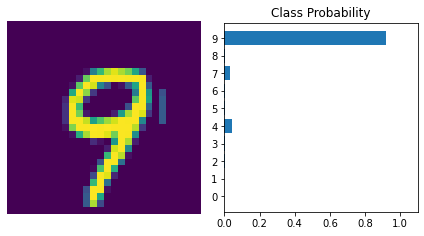

In [19]:


%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

